<h1 style="color:red;"><strong>0. Look at the big Picture</h1>

<h2 style="color:yellow;">0.1 Frame the Problems</h2>

* What's the business objective
* How does the company expect to use and benefit from the model?
* Frame problems --> chose algorithm --> performance measure --> ways/time to tune the model

<h2 style="color:yellow;">0.2 Chose performance measure (Loss)</h2>


### **0.2.1 Regression**
* RMSE
* MAE

### **0.2.2 Classification**
* Binary Cross Entropy 
* Sparse Categorical Cross Entropy
* Categorial Cross Entropy

<h2 style="color:yellow;">0.3 Chose performance measure (Metrics)</h2>

### **0.3.1 Regression**
* Adjusted r^2
* 

### **0.3.2 Classification**
* AUC
* Accuracy
* False Positive
* False Negative
* F1 Score
* Confusion matrix

<h2 style="color:yellow;">0.4 Check the Assumptions</h2>

<h1 style="color:red;"><strong>1. Get the Data</h1>

In [22]:
import pandas as pd
import numpy as np
#-----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r"dataset\taiwanese_bankruptcy_data.csv")

In [24]:
# Take a look at the top 5 rows
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [26]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<h1 style="color:red;"><strong>2. Data Cleaning for EDA</h1>

In [66]:
df = pd.read_csv(r'dataset\ba_raw_data.csv')

<h2 style="color:yellow;">2.1 Formating</h2>

In [67]:
df.head(1)

,Unnamed: 0,dates,customer_names,countries,review_bodies,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,0,2nd April 2024,E Dodson,(United Kingdom),✅ Trip Verified | This is the first time I ha...,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,1.0,1,no


In [68]:
df.columns

Index(['Unnamed: 0', 'dates', 'customer_names', 'countries', 'review_bodies',
       'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

### 2.1.1 Format column names

In [75]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [ ]:
df = rename_columns(df)

In [70]:
df.columns

Index(['unnamed:_0', 'dates', 'customer_names', 'countries', 'review_bodies',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'ground_service', 'wifi_&_connectivity', 'value_for_money',
       'recommended'],
      dtype='object')

In [71]:
# rename function:
df.rename(columns={'unnamed:_0': 'id'}, inplace=True)

In [72]:
df.columns

Index(['id', 'dates', 'customer_names', 'countries', 'review_bodies',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'ground_service', 'wifi_&_connectivity', 'value_for_money',
       'recommended'],
      dtype='object')

### 2.1.2 Format data body

In [34]:
df['countries'].head(1)

0        (United Kingdom) 
1        (United Kingdom) 
2        (United Kingdom) 
3        (United Kingdom) 
4        (United Kingdom) 
               ...        
3775     (United Kingdom) 
3776     (United Kingdom) 
3777     (United Kingdom) 
3778      (United States) 
3779     (United Kingdom) 
Name: countries, Length: 3780, dtype: object

In [35]:
def clean_country(df):
    # Remove parentheses from the countries column
    df['countries'] = df['countries'].str.replace('(', '').str.replace(')', '')
    return df

In [36]:
df = clean_country(df)

In [37]:
df['countries'].head(1)

0     United Kingdom 
Name: countries, dtype: object

In [ ]:
df['review'].head(1)

In [38]:
def clean_review(df):
    # Clean Review Bodies into Bodies and Verified
    if df['review_bodies'] is None:
        df.drop(columns=['review_bodies'], inplace=True)
    # Split the review_bodies column into two separate columns
    split_df = df['review_bodies'].str.split('|', expand=True)

    # If the split results in only one column, assign the first column to 'review' and set 'verified' to None
    if len(split_df.columns) == 1:
        split_df.columns = ['review']
        split_df['verified'] = None
    else:
        split_df.columns = ['verified', 'review']

    # Assign the split columns to the DataFrame
    df[['verified', 'review']] = split_df

    # Check if the review column is None and the verified column is not None
    mask = (df['review'].isnull()) & (df['verified'].notnull())

    # Swap values between review and verified columns where the condition is met
    df.loc[mask, ['review', 'verified']] = df.loc[mask, ['verified', 'review']].values

    # Assuming df is your DataFrame
    df.drop(columns=['review_bodies'], inplace=True)

    # Check if 'verified' column contains 'Trip Verified' and replace with True, else replace with False
    df['verified'] = df['verified'].str.contains('Trip Verified', case=False, na=False)

    return df

In [39]:
df = clean_review(df)

In [40]:
df[['review','verified']].head(1)

,review,verified
0,This is the first time I have seen the new C...,True


In [45]:
df['dates'].head(1)

0    2nd April 2024
Name: dates, dtype: object

In [41]:
# Cleaned dates column and split it into Date Review, Day Review, Month Review, Year Review 
def clean_date_review(df):
    # Split the 'dates' column into separate columns for day, month, and year
    df[['day_review', 'month_review', 'year_review']] = df['dates'].str.split(expand=True)

    # Remove the last 2 characters from the 'Day Review' column
    df['day_review'] = df['day_review'].str[:-2]

    # Concatenate 'Day Review', 'Month Review', and 'Year Review' into a single string
    date_strings = df['day_review'] + ' ' + df['month_review'] + ' ' + df['year_review']

    # Create the 'Dates' column by converting the concatenated strings to datetime objects
    df['dates_review'] = pd.to_datetime(date_strings, format='%d %B %Y')

    # Create the 'Dates Review' column by converting the concatenated strings to datetime objects
    df['dates_review'] = pd.to_datetime(df['dates_review'], format='%Y-%m-%d')

    return df

In [42]:
df = clean_date_review(df)

In [44]:
df['dates_review'].head(1)

0   2024-04-02
Name: dates_review, dtype: datetime64[ns]

Many more way to clean this df, but for the sake of time let move to other formating

### 2.1.3 Format Datatypes
After we format all the data body and columns, let's format the data types

In [47]:
df = pd.read_csv(r'dataset\ba_clean_data.csv')

In [48]:
df.dtypes

id                    int64
verified               bool
date_review          object
day_review            int64
month_review         object
month_review_num      int64
year_review           int64
verified.1             bool
name                 object
month_fly            object
month_fly_num       float64
year_fly            float64
month_year_fly       object
country              object
aircraft             object
type                 object
seat_type            object
route                object
seat_comfort        float64
cabit_serv          float64
food                float64
ground_service      float64
wifi                float64
money_value           int64
recommended          object
review               object
dtype: object

In [50]:
# format date_review to datetime
df['date_review'] = pd.to_datetime(df['date_review'])

In [53]:
df['date_review'].head(1)

0   2024-04-02
Name: date_review, dtype: datetime64[ns]

<h1 style="color:red;"><strong>3. Attribute Combination</h1>

In [54]:
df = pd.read_csv(r'dataset\ba_clean_data.csv')

In [57]:
df['route'].head(5)

0         Doha to London Heathrow
1         Doha to London Heathrow
2    London Heathrow to São Paulo
3         London Heathrow to Nice
4                 London to Tokyo
Name: route, dtype: object

In [58]:
def clean_route(df):
    """
    Clean the 'route' column of the DataFrame and split it into 'origin', 'destination', and 'transit' columns.

    Parameters:
        df (DataFrame): DataFrame containing a 'route' column.

    Returns:
        DataFrame: DataFrame with 'origin', 'destination', and 'transit' columns.
    """
    def split_route(route):
        if pd.isna(route):
            return pd.NA, pd.NA, pd.NA
        if ' to ' in route:
            parts = route.split(' to ')
            origin = parts[0].strip()
            if len(parts) > 1:
                destination, transit = parts[1].split(' via ') if ' via ' in parts[1] else (parts[1], None)
            else:
                destination, transit = None, None
        else:
            parts = route.split('-')
            origin = parts[0].strip()
            destination = parts[1].strip() if len(parts) > 1 else None
            transit = None
        return origin.strip(), destination.strip() if destination else None, transit.strip() if transit else None

    df[['origin', 'destination', 'transit']] = df['route'].apply(split_route).apply(pd.Series)
    # Replace 'LHR' and 'Heathrow' with 'London Heathrow' in all columns
    df[['origin', 'destination', 'transit']] = df[['origin', 'destination', 'transit']].replace({
        'LHR': 'London Heathrow',
        'Heathrow': 'London Heathrow',
        'London Heatrow': 'London Heathrow',
        'London-Heathrow': 'London Heathrow',
        'London heathrow': 'London Heathrow',
        'London Heaathrow': 'London Heathrow',
        'London UK (Heathrow)': 'London Heathrow',
        'Heathrow (London)': 'London Heathrow',
        'Gatwick':'London Gatwick',
        'LGW':'London Gatwick',
    })

    return df

In [59]:
df = clean_route(df)

In [61]:
df[['origin','destination','transit']].head(5)

,origin,destination,transit
0,Doha,London Heathrow,None
1,Doha,London Heathrow,None
2,London Heathrow,São Paulo,None
3,London Heathrow,Nice,None
4,London,Tokyo,None


In [62]:
df['money_value'].head(5)

0    1
1    3
2    4
3    1
4    4
Name: money_value, dtype: int64

In [63]:
def calculate_experience(df):
    conditions = [
        (df['money_value'] <= 2),
        (df['money_value'] == 3),
        (df['money_value'] >= 4)
    ]

    choices = ['Poor', 'Fair', 'Good']

    df['experience'] = np.select(conditions, choices, default='unknown')
    return df

In [64]:
df = calculate_experience(df)

In [65]:
df['experience'].head(5)

0    Poor
1    Fair
2    Good
3    Poor
4    Good
Name: experience, dtype: object

<h1 style="color:red;"><strong> 4. EDA</h1>

In [73]:
df = pd.read_csv(r'dataset\CustomerReturns.csv')

In [76]:
df = rename_columns(df)

In [77]:
df.apply(lambda col: col.unique())

gender                                                          [1, 0]
education                                                       [0, 1]
race                                                            [0, 1]
home_ownership                                                  [0, 1]
age                  [44, 20, 45, 35, 24, 22, 39, 32, 63, 65, 25, 4...
tenure               [52, 8, 6, 3, 12, 7, 17, 25, 2, 1, 11, 5, 16, ...
num_purchase         [21, 15, 13, 5, 18, 20, 11, 14, 9, 2, 1, 3, 12...
lifetime_purchase    [18590, 17184, 15024, 5822, 27480, 37534, 2188...
ave_price            [885, 1146, 1156, 1164, 1527, 1877, 1989, 2045...
num_of_returns       [8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21,...
amt_returned         [7082, 9165, 9246, 9316, 12213, 15014, 15915, ...
return_loss          [1416, 1833, 1849, 1863, 2443, 3003, 3183, 327...
dtype: object

In [78]:
categorical_columns = ['gender', 'education', 'race', 'home_ownership']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

## 3.1 Univariate

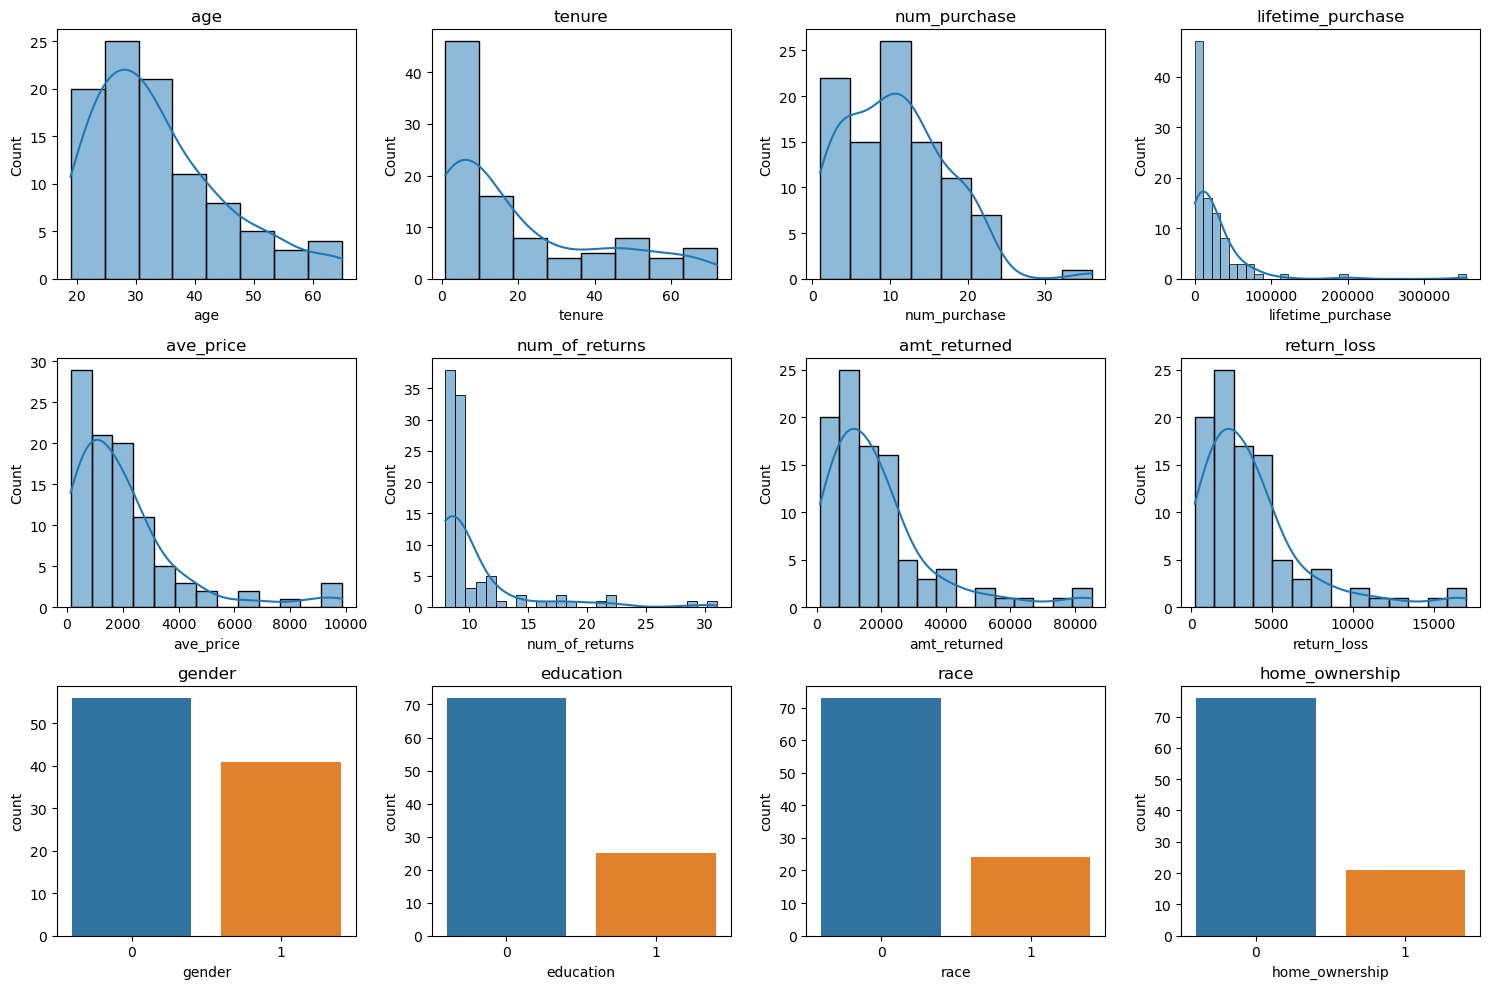

In [79]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

for i, column in enumerate(categorical_columns):
    row = (i + len(numerical_columns)) // num_cols
    col = (i + len(numerical_columns)) % num_cols
    sns.countplot(data=df, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

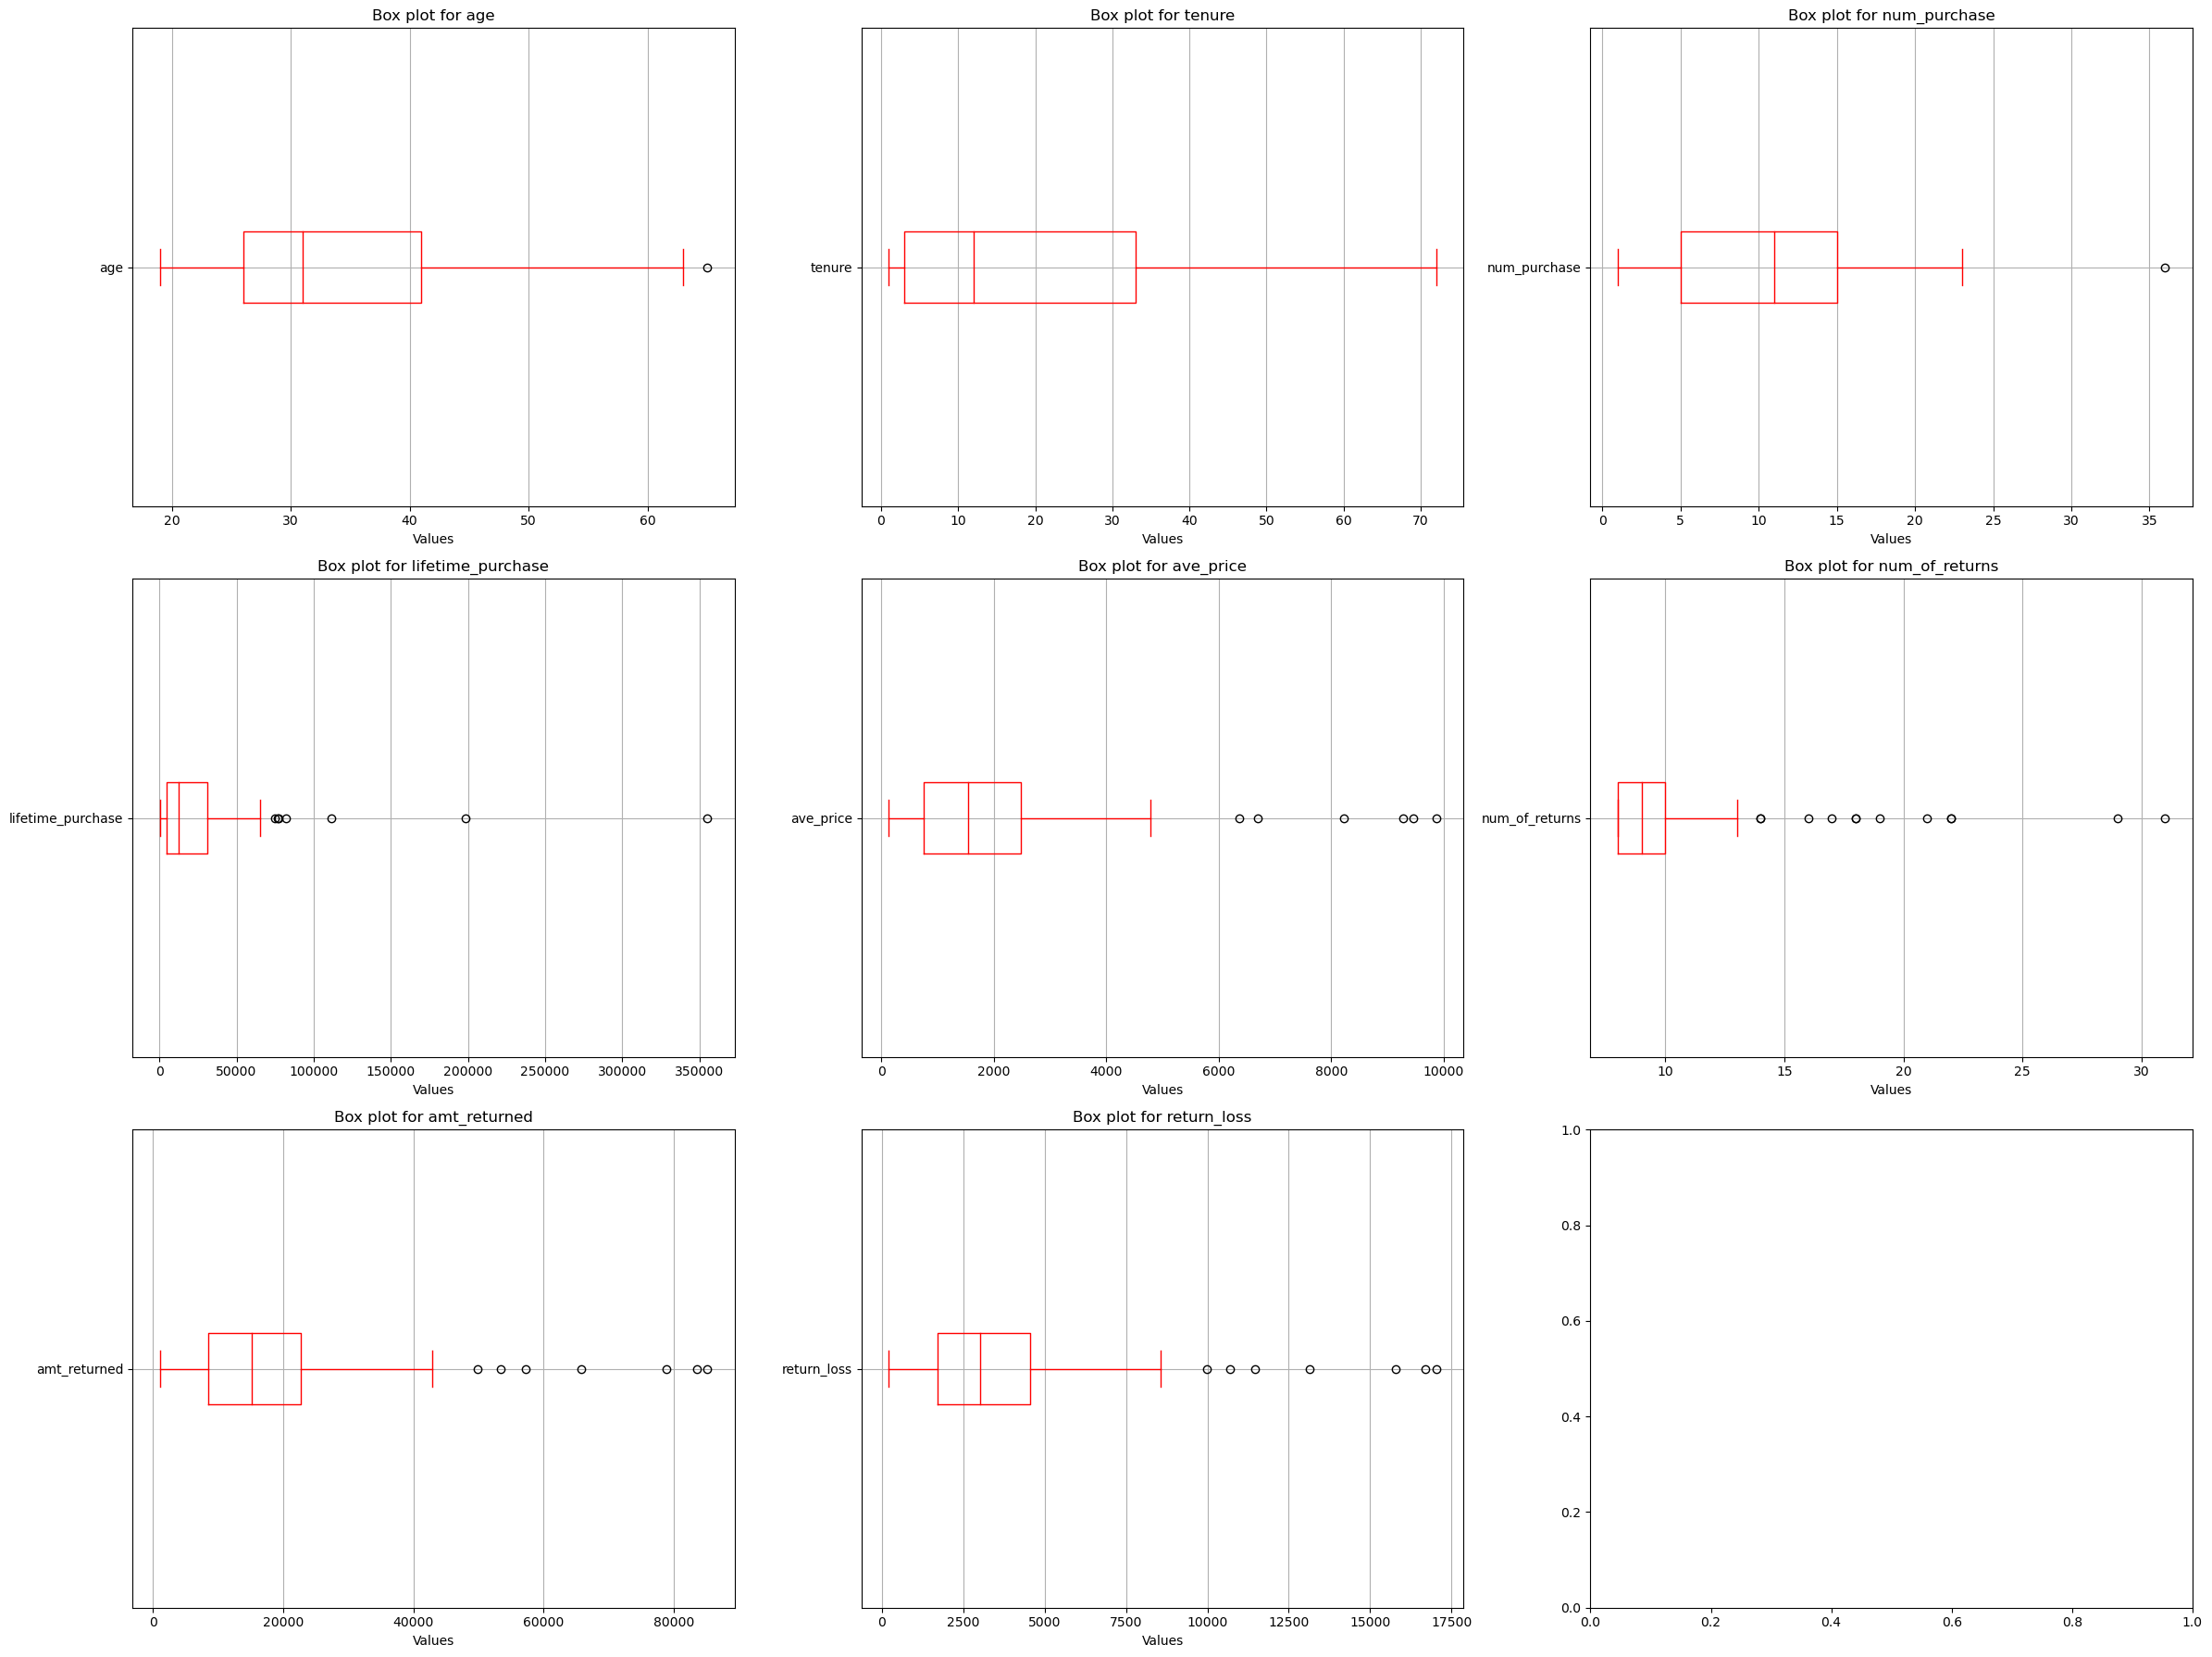

In [81]:
num_rows = 3
num_cols = len(numerical_columns) // num_rows + (len(numerical_columns) % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax, color='red', vert=False)  # Setting color to red and making boxplot horizontal
    ax.set_title(f'Box plot for {col}')
    ax.set_xlabel('Values')  # Set xlabel since the boxplot is horizontal
    ax.set_ylabel('')  # Remove the y-axis label

plt.tight_layout()
plt.show()

## 3.2 Bivariate

In [ ]:
sns.pairplot(df[[numerical_columns]])
plt.title('Pairplot of Numerical Variables')
plt.show()

## 3.3 Multivariate

# 4. Data Cleaning for Modelling

## 4.1 Handle Nulls

## 4.2 Handle Outliers

In [ ]:
# Remove Outlier
def remove_outliers(df, column_names=None):
    """
    Remove outliers from specific columns in the DataFrame based on the interquartile range (IQR) method,
    or remove outliers from all numerical columns if column_names is None.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_names: list or None, default None
        The list of column names for which outliers are to be removed,
        or None to remove outliers from all numerical columns.

    Returns:
    - df_filtered: DataFrame
        The DataFrame with outliers removed.
    """
    if column_names is None:
        numerical_columns = df.select_dtypes(include='number').columns
    else:
        numerical_columns = column_names

    total_removed = 0
    total_rows = len(df)

    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the specified column
        removed_rows = len(df) - len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
        total_removed += removed_rows

        # Update DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

        # Print the number and percentage of removed values if any rows have been removed
        percentage_removed = (removed_rows / total_rows) * 100
        print(f"Removed {removed_rows} rows ({percentage_removed:.2f}%) due to outliers in column '{col}'.")

    return df

# 5.Preprocess Data 

In [ ]:
def scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using Min-Max scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = MinMaxScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled